In [49]:
import string 
import re
import nltk
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
import plotly as px
stemmer = nltk.SnowballStemmer('english')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
data =  pd.read_csv("resume_data.csv")

In [3]:
data.head

<bound method NDFrame.head of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [4]:
data.tail

<bound method NDFrame.tail of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [5]:
data.shape

(962, 2)

In [6]:
data.columns

Index(['Category', 'Resume'], dtype='object')

In [7]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
data.nunique()

Category     25
Resume      166
dtype: int64

In [14]:
data.duplicated().sum()

796

In [15]:
data.nunique()

Category     25
Resume      166
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [36]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

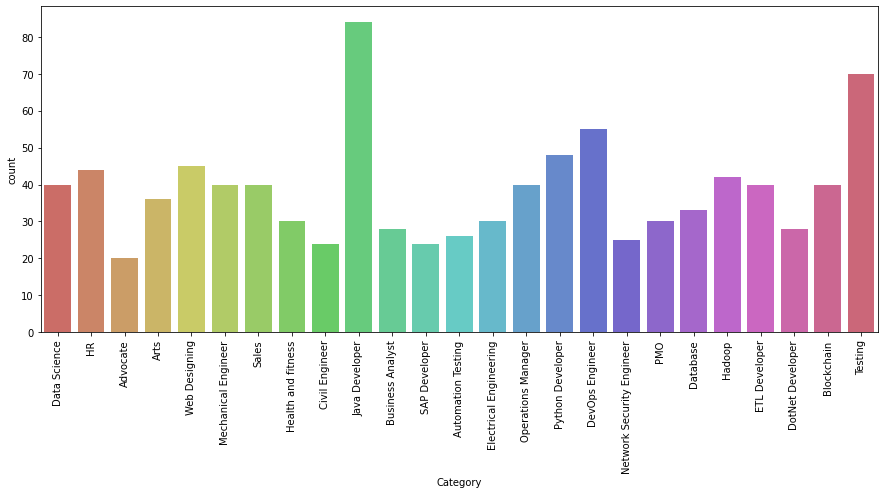

In [35]:
plt.figure(figsize=(15,6))
sns.countplot('Category', data = data, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [27]:
fig = px.hist_series(data,x ='Category',color='Category')
fig.show()

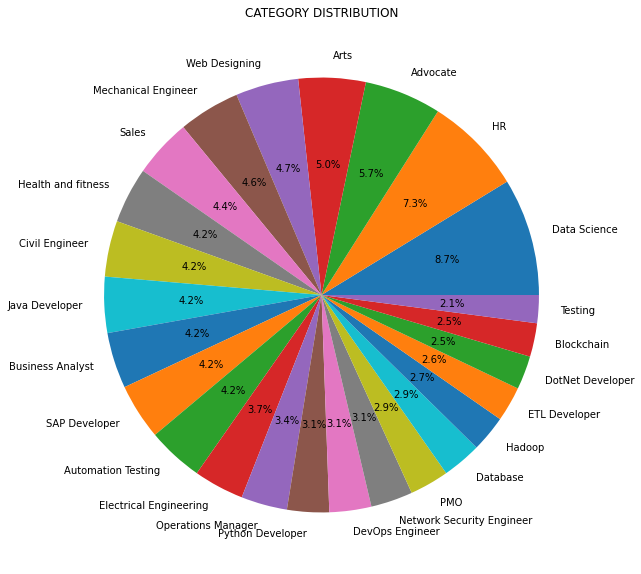

In [34]:
targetCounts = data['Category'].value_counts()
targetLabels = data['Category'].unique()
plt.figure(figsize=(20,10))
plt.pie(targetCounts, labels = targetLabels,autopct='%1.1f%%')
plt.title('CATEGORY DISTRIBUTION')
plt.show()

In [43]:
#This piece of code cleans our data and rids it of any unwanted symbols or spaces
def cleanResume(resumeText):
  resumeText = str(resumeText).lower()
  resumeText = re.sub('\[.*?\]','',resumeText)
  resumeText = re.sub('https?://\S+|www\S+','',resumeText)
  resumeText = re.sub('<.*?>+','',resumeText)
  resumeText = re.sub('[%s]'% re.escape(string.punctuation),
                '',resumeText)
  resumeText = re.sub('\n,','',resumeText)
  resumeText = re.sub('\w*\d\w*','',resumeText)
  resumeText = [word for word in resumeText.split(' ') if word not in stopword]
  resumeText = "".join(resumeText)
  resumeText = [stemmer.stem(word) for word in resumeText.split()]
  resumeText = ' '.join(resumeText)
  return resumeText
data['Cleaned_resume'] = data['Resume'].apply(cleanResume)

In [44]:
print(data['Cleaned_resume'])

0      skillsprogramminglanguagespythonpandasnumpysci...
1      educationdetail maymayuitrgpv datascientist da...
2      areasinterestdeeplearningcontrolsystemdesignpr...
3      skillsâ¢râ¢pythonâ¢saphanaâ¢tableauâ¢saph...
4      educationdetail mcaymcaustfaridabadharyana dat...
                             ...                        
957    computerskillsâ¢proficientmsofficewordbasicex...
958    âwillingnessacceptchallengesâpositivethink...
959    personalskillsâ¢quicklearnerâ¢eagernesslearn...
960    computerskillssoftwareknowledgemspowerpointmso...
961    skillsetoswindowsdatabasemysqlsqlserverlanguag...
Name: Cleaned_resume, Length: 962, dtype: object


In [51]:
SetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('skilldetail', 962), ('â', 588), ('ã\x98â', 455), ('descript', 358), ('educationdetail', 248), ('companydetail', 216), ('compani', 177), ('rolesrespons', 175), ('â\x80¢', 150), ('project', 143), ('respons', 140), ('descriptionrespons', 114), ('ï\x83\x98', 108), ('javadevelop', 102), ('teamsiz', 91), ('â·â', 84), ('javaexpriencemonth', 80), ('cexpriencemonth', 78), ('databaseusedsql', 72), ('positionsoftwaredevelop', 72), ('companytataconsultancyservic', 70), ('projectdescript', 65), ('expriencemonth', 62), ('databaseexpriencemonth', 61), ('teamlead', 60), ('descriptionpun', 59), ('salesmanag', 56), ('â\x97\x8fmaderequiredgraphicsprojectphotoshop', 54), ('technologiesusedhtmlcssbootstrapphpjqueryajaxjavascript', 54), ('myresponsibilitiesprojectinclud', 51), ('companynendrasystechnologiespvtltd', 51), ('operationsmanag', 50), ('pythonexpriencemonth', 49), ('mysqlexpriencemonth', 49), ('durationmonth', 46), ('javascriptexpriencemonth', 45), ('hr', 44), ('documentationexpriencemonth', 43

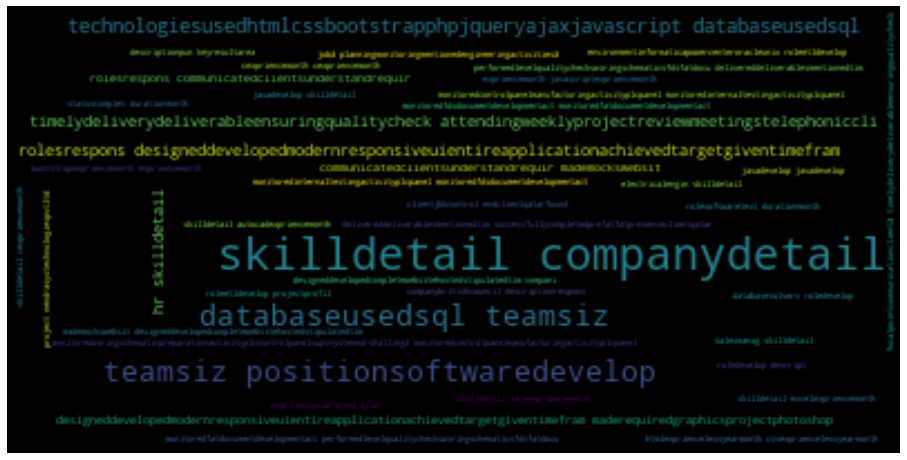

In [52]:
word_cloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(16,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
data1 = ['Category']
le = LabelEncoder()
for i in data1:
    data[i] = le.fit_transform(data[i])

In [57]:
data.head()

,Category,Resume,Cleaned_resume
0,7,Skills * Programming Languages: Python (pandas...,skillsprogramminglanguagespythonpandasnumpysci...
1,7,Education Details \r\nMay 2013 to May 2017 B.E...,educationdetail maymayuitrgpv datascientist da...
2,7,"Areas of Interest Deep Learning, Control Syste...",areasinterestdeeplearningcontrolsystemdesignpr...
3,7,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skillsâ¢râ¢pythonâ¢saphanaâ¢tableauâ¢saph...
4,7,"Education Details \r\n MCA YMCAUST, Faridab...",educationdetail mcaymcaustfaridabadharyana dat...


In [58]:
data.tail()

,Category,Resume,Cleaned_resume
957,23,Computer Skills: â¢ Proficient in MS office (...,computerskillsâ¢proficientmsofficewordbasicex...
958,23,â Willingness to accept the challenges. â ...,âwillingnessacceptchallengesâpositivethink...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personalskillsâ¢quicklearnerâ¢eagernesslearn...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computerskillssoftwareknowledgemspowerpointmso...
961,23,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,skillsetoswindowsdatabasemysqlsqlserverlanguag...


In [59]:
data.Category.value_counts().head()

15    84
23    70
8     55
20    48
24    45
Name: Category, dtype: int64

In [60]:
data.Category.value_counts().tail()

2     26
17    25
22    24
5     24
0     20
Name: Category, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [70]:
#FEATURE SELECTION
requiredText = data['Cleaned_resume'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [65]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,
                                                 requiredTarget,
                                                 random_state=1, 
                                                 test_size=0.2,
                                                 shuffle=True, 
                                                 stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(769, 5561)
(193, 5561)


In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [67]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [68]:
print('KNC Accuracy Training Data: {:.2f}'.format(clf.score(X_train, y_train)))
print('KNC Accuracy Test Data: {:.2f}'.format(clf.score(X_test, y_test)))

KNC Accuracy Training Data: 0.97
KNC Accuracy Test Data: 0.92


In [69]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, 
                                                             metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      0.60      0.75         5
           6       1.00      0.14      0.25         7
           7       0.80      1.00      0.89         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      0.33      0.50         6
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         6
          14       0.64      1.00      0.78         9
          15       0.94      1.00      0.